In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(dataset_url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
## selecting features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
data = df[features + ['Survived']]

In [9]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [14]:
## data preprocessing (numeric representation)
data['Embarked'].unique()
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

/tmp/ipython-input-2339739421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [15]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

/tmp/ipython-input-2549565789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [16]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,0.0,1
3,1,1,35.0,1,0,53.1000,0.0,1
4,3,0,35.0,0,0,8.0500,0.0,0


In [17]:
data.isna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
 7   Survived  891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [19]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

/tmp/ipython-input-1548492273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].fillna(data['Age'].mean())


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
 7   Survived  891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [21]:
X = data[features]
y = data['Survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [23]:
len(X_train)

668

In [24]:
## model training

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = model.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.8071748878923767

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       134
           1       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

[[115  19]
 [ 24  65]]


In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
report = classification_report(y_test, y_pred, output_dict=True)

In [35]:
acc  = accuracy_score(y_test, y_pred)
prec = report['weighted avg']['precision']
rec  = report['weighted avg']['recall']
f1   = report['weighted avg']['f1-score']

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")

Accuracy : 0.807
Precision: 0.806
Recall   : 0.807
F1-score : 0.806


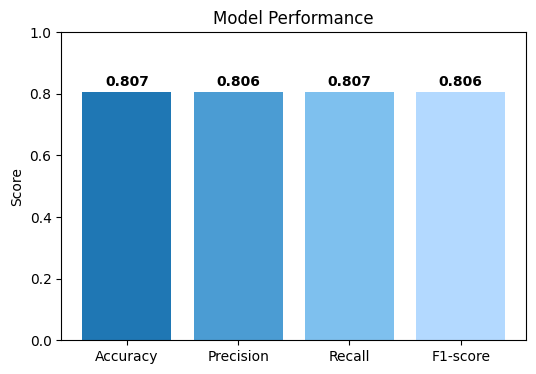

In [36]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values  = [acc, prec, rec, f1]
plt.figure(figsize=(6,4))
bars = plt.bar(metrics, values, color=['#1f77b4', '#4b9cd3', '#7ec0ee', '#b3d9ff'])
plt.ylim(0, 1)
plt.title('Model Performance')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
plt.show()